Fitur yang digunakan:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Jumlah Data Training: 105
Jumlah Data Testing : 45

=== HASIL PENGUJIAN BERBAGAI NILAI K ===
k = 1 -> Akurasi = 1.0000
k = 3 -> Akurasi = 1.0000
k = 5 -> Akurasi = 1.0000
k = 7 -> Akurasi = 1.0000
k = 9 -> Akurasi = 1.0000

Nilai k terbaik adalah k = 1 dengan akurasi 1.0000


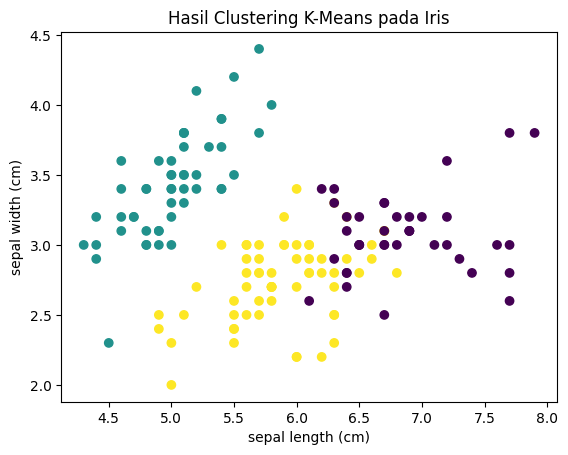


Clustering K-Means selesai ditampilkan.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 5.1 Load dataset Iris & fitur
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Fitur yang digunakan:")
for f in feature_names:
    print("-", f)

# 5.2 Pembagian training & testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("\nJumlah Data Training:", len(X_train))
print("Jumlah Data Testing :", len(X_test))

# 5.3 Klasifikasi KNN dengan variasi k
k_values = [1, 3, 5, 7, 9]
accuracies = []

print("\n=== HASIL PENGUJIAN BERBAGAI NILAI K ===")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k} -> Akurasi = {acc:.4f}")

# 5.4 Evaluasi akurasi terbaik
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)

print(f"\nNilai k terbaik adalah k = {best_k} dengan akurasi {best_acc:.4f}")

# Tambahan: K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Hasil Clustering K-Means pada Iris")
plt.show()

print("\nClustering K-Means selesai ditampilkan.")


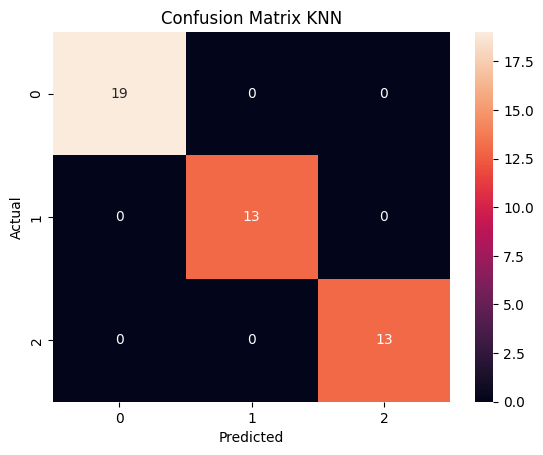

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [2]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN")
plt.show()

print(classification_report(y_test, y_pred, target_names=target_names))


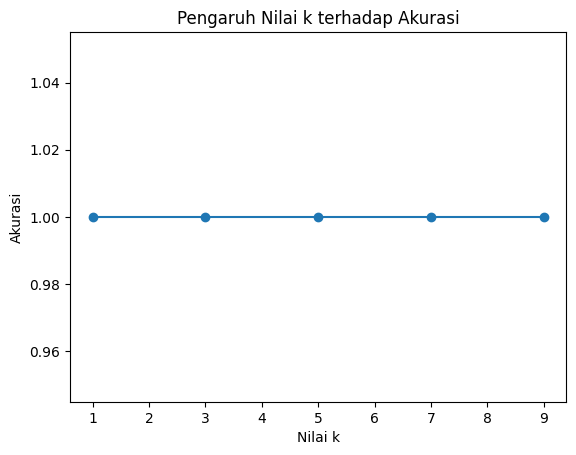

In [3]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Nilai k")
plt.ylabel("Akurasi")
plt.title("Pengaruh Nilai k terhadap Akurasi")
plt.show()


In [4]:
print("Contoh Hasil Prediksi:")
for i in range(10):
    print(f"Data ke-{i+1} | Prediksi: {target_names[y_pred[i]]} | Aktual: {target_names[y_test[i]]}")


Contoh Hasil Prediksi:
Data ke-1 | Prediksi: versicolor | Aktual: versicolor
Data ke-2 | Prediksi: setosa | Aktual: setosa
Data ke-3 | Prediksi: virginica | Aktual: virginica
Data ke-4 | Prediksi: versicolor | Aktual: versicolor
Data ke-5 | Prediksi: versicolor | Aktual: versicolor
Data ke-6 | Prediksi: setosa | Aktual: setosa
Data ke-7 | Prediksi: versicolor | Aktual: versicolor
Data ke-8 | Prediksi: virginica | Aktual: virginica
Data ke-9 | Prediksi: versicolor | Aktual: versicolor
Data ke-10 | Prediksi: versicolor | Aktual: versicolor


In [6]:
from itertools import combinations

print("\n=== PENGUJIAN KOMBINASI FITUR ===")

best_acc = 0
best_features = None

for r in range(1, 5):
    for combo in combinations(range(4), r):
        X_subset = X[:, combo]
        
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_subset, y, test_size=0.3, random_state=42
        )
        
        knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
        knn.fit(X_tr, y_tr)
        y_pr = knn.predict(X_te)
        acc = accuracy_score(y_te, y_pr)
        
        if acc > best_acc:
            best_acc = acc
            best_features = combo

print("\nAkurasi terbaik dari kombinasi fitur:", best_acc)
print("Fitur optimal yang digunakan:")

for idx in best_features:
    print("-", feature_names[idx])



=== PENGUJIAN KOMBINASI FITUR ===

Akurasi terbaik dari kombinasi fitur: 1.0
Fitur optimal yang digunakan:
- sepal length (cm)
- petal length (cm)
- petal width (cm)
